In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pickle


In [24]:
# Load the training and test datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/train.csv')

# Check the first few rows to understand the structure
print(train_data.head())

print(test_data.head())



   User_Key  Birth_Year   Edu_Level Family_Status  Annual_Income  Kids_Count  \
0      2607        1953  Graduation        Single        40464.0           0   
1      7247        1960  Graduation         Widow        47916.0           0   
2      5802        1972       Basic       Married        14188.0           0   
3      2147        1969  Graduation      Together        76653.0           0   
4      3759        1958  Graduation      Together        65196.0           0   

   Teens_Count    Reg_Date  Last_Visit  Spent_Wines  ...  Web_Visits  \
0            1  11-01-2013          78          424  ...           8   
1            1  22-11-2012          72          505  ...           6   
2            0  28-02-2013          40            2  ...           6   
3            0  16-08-2013          91          736  ...           2   
4            2  25-07-2013          34          743  ...           5   

   Campaign_1  Campaign_2  Campaign_3  Campaign_4  Campaign_5  Complaint_Flag  \
0    

In [26]:
print(train_data.columns)


Index(['User_Key', 'Birth_Year', 'Edu_Level', 'Family_Status', 'Annual_Income',
       'Kids_Count', 'Teens_Count', 'Reg_Date', 'Last_Visit', 'Spent_Wines',
       'Spent_Fruits', 'Spent_Meat', 'Spent_Fish', 'Spent_Sweets',
       'Spent_Gold', 'Promo_Purchases', 'Web_Orders', 'Catalog_Orders',
       'Store_Orders', 'Web_Visits', 'Campaign_1', 'Campaign_2', 'Campaign_3',
       'Campaign_4', 'Campaign_5', 'Complaint_Flag', 'Contact_Cost',
       'Total_Revenue', 'Next_Purchase'],
      dtype='object')


In [25]:
if 'Next_Purchase' not in train_data.columns:
    print("Next_Purchase column is missing!")


In [27]:
X_train = train_data.drop(columns=['Next_Purchase', 'User_Key'])
y_train = train_data['Next_Purchase']


In [28]:
print(train_data.isnull().sum())  # Check how many missing values exist


User_Key            0
Birth_Year          0
Edu_Level           0
Family_Status       0
Annual_Income      23
Kids_Count          0
Teens_Count         0
Reg_Date            0
Last_Visit          0
Spent_Wines         0
Spent_Fruits        0
Spent_Meat          0
Spent_Fish          0
Spent_Sweets        0
Spent_Gold          0
Promo_Purchases     0
Web_Orders          0
Catalog_Orders      0
Store_Orders        0
Web_Visits          0
Campaign_1          0
Campaign_2          0
Campaign_3          0
Campaign_4          0
Campaign_5          0
Complaint_Flag      0
Contact_Cost        0
Total_Revenue       0
Next_Purchase       0
dtype: int64


In [30]:
# Fill missing values in 'Annual_Income' column with the mean value
train_data['Annual_Income'].fillna(train_data['Annual_Income'].mean(), inplace=True)

# Verify the missing values are handled
print(train_data.isnull().sum())


User_Key           0
Birth_Year         0
Edu_Level          0
Family_Status      0
Annual_Income      0
Kids_Count         0
Teens_Count        0
Reg_Date           0
Last_Visit         0
Spent_Wines        0
Spent_Fruits       0
Spent_Meat         0
Spent_Fish         0
Spent_Sweets       0
Spent_Gold         0
Promo_Purchases    0
Web_Orders         0
Catalog_Orders     0
Store_Orders       0
Web_Visits         0
Campaign_1         0
Campaign_2         0
Campaign_3         0
Campaign_4         0
Campaign_5         0
Complaint_Flag     0
Contact_Cost       0
Total_Revenue      0
Next_Purchase      0
dtype: int64


<ipython-input-30-b3986c18cee4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Annual_Income'].fillna(train_data['Annual_Income'].mean(), inplace=True)


In [31]:
# One-hot encode categorical columns
train_data_encoded = pd.get_dummies(train_data, columns=['Edu_Level', 'Family_Status', 'Reg_Date'], drop_first=True)

# Check the encoded dataset
print(train_data_encoded.head())


   User_Key  Birth_Year  Annual_Income  Kids_Count  Teens_Count  Last_Visit  \
0      2607        1953        40464.0           0            1          78   
1      7247        1960        47916.0           0            1          72   
2      5802        1972        14188.0           0            0          40   
3      2147        1969        76653.0           0            0          91   
4      3759        1958        65196.0           0            2          34   

   Spent_Wines  Spent_Fruits  Spent_Meat  Spent_Fish  ...  \
0          424            17         118           7  ...   
1          505             0          26           0  ...   
2            2             7          11          16  ...   
3          736            63         946         219  ...   
4          743            19         181          12  ...   

   Reg_Date_31-03-2013  Reg_Date_31-03-2014  Reg_Date_31-05-2013  \
0                False                False                False   
1                False

In [32]:
# Check the first few rows of X_train and y_train to ensure they are correct
print(X_train.head())
print(y_train.head())


   Birth_Year   Edu_Level Family_Status  Annual_Income  Kids_Count  \
0        1953  Graduation        Single        40464.0           0   
1        1960  Graduation         Widow        47916.0           0   
2        1972       Basic       Married        14188.0           0   
3        1969  Graduation      Together        76653.0           0   
4        1958  Graduation      Together        65196.0           0   

   Teens_Count    Reg_Date  Last_Visit  Spent_Wines  Spent_Fruits  ...  \
0            1  11-01-2013          78          424            17  ...   
1            1  22-11-2012          72          505             0  ...   
2            0  28-02-2013          40            2             7  ...   
3            0  16-08-2013          91          736            63  ...   
4            2  25-07-2013          34          743            19  ...   

   Store_Orders  Web_Visits  Campaign_1  Campaign_2  Campaign_3  Campaign_4  \
0             8           8           0           0    

In [34]:
# Preprocess the test data (same as training data)
X_test = test_data.drop(columns=['User_Key'])

# One-hot encoding for categorical features in test data
X_test_encoded = pd.get_dummies(X_test, columns=['Edu_Level', 'Family_Status', 'Reg_Date'], drop_first=True)

# Ensure the test data has the same features as the training data
X_test_encoded = X_test_encoded.reindex(columns=X_train.columns, fill_value=0)

# Display the first few rows of the preprocessed test data
print(X_test_encoded.head())


   Birth_Year  Edu_Level  Family_Status  Annual_Income  Kids_Count  \
0        1953          0              0        40464.0           0   
1        1960          0              0        47916.0           0   
2        1972          0              0        14188.0           0   
3        1969          0              0        76653.0           0   
4        1958          0              0        65196.0           0   

   Teens_Count  Reg_Date  Last_Visit  Spent_Wines  Spent_Fruits  ...  \
0            1         0          78          424            17  ...   
1            1         0          72          505             0  ...   
2            0         0          40            2             7  ...   
3            0         0          91          736            63  ...   
4            2         0          34          743            19  ...   

   Store_Orders  Web_Visits  Campaign_1  Campaign_2  Campaign_3  Campaign_4  \
0             8           8           0           0           0    

In [36]:
# Check the data types of all columns
print(train_data_encoded.dtypes)

# Check if there are any non-numeric columns remaining
non_numeric_columns = train_data_encoded.select_dtypes(include=['object']).columns
print("Non-numeric columns: ", non_numeric_columns)

# If there are any, encode them with pd.get_dummies
if len(non_numeric_columns) > 0:
    train_data_encoded = pd.get_dummies(train_data_encoded, columns=non_numeric_columns, drop_first=True)

# Check the data types again
print(train_data_encoded.dtypes)


User_Key                 int64
Birth_Year               int64
Annual_Income          float64
Kids_Count               int64
Teens_Count              int64
                        ...   
Reg_Date_31-08-2012       bool
Reg_Date_31-08-2013       bool
Reg_Date_31-10-2012       bool
Reg_Date_31-12-2012       bool
Reg_Date_31-12-2013       bool
Length: 690, dtype: object
Non-numeric columns:  Index([], dtype='object')
User_Key                 int64
Birth_Year               int64
Annual_Income          float64
Kids_Count               int64
Teens_Count              int64
                        ...   
Reg_Date_31-08-2012       bool
Reg_Date_31-08-2013       bool
Reg_Date_31-10-2012       bool
Reg_Date_31-12-2012       bool
Reg_Date_31-12-2013       bool
Length: 690, dtype: object


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features and target
X = train_data_encoded.drop(columns=['Next_Purchase', 'User_Key'])  # Drop 'Next_Purchase' and 'User_Key'
y = train_data_encoded['Next_Purchase']

# Split the data into training and validation sets (80% training, 20% validation)
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_pred = rf_model.predict(X_valid_split)

# Evaluate the model
print("Accuracy on validation set: ", accuracy_score(y_valid_split, y_pred))
print("Classification Report: \n", classification_report(y_valid_split, y_pred))


Accuracy on validation set:  0.8737623762376238
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       341
           1       0.80      0.25      0.39        63

    accuracy                           0.87       404
   macro avg       0.84      0.62      0.66       404
weighted avg       0.87      0.87      0.84       404



In [38]:
pip install xgboost


In [40]:
# Reapply one-hot encoding to the categorical columns
train_data_encoded = pd.get_dummies(train_data, columns=['Edu_Level', 'Family_Status', 'Reg_Date'], drop_first=True)

# Ensure that all columns are numeric
print(train_data_encoded.dtypes)

# Separate features and target variable
X = train_data_encoded.drop('Next_Purchase', axis=1)
y = train_data_encoded['Next_Purchase']

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_pred = xgb_model.predict(X_val_split)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_val_split, y_pred)
print(f'Accuracy on validation set: {accuracy}')
print('Classification Report:')
print(classification_report(y_val_split, y_pred))


User_Key                 int64
Birth_Year               int64
Annual_Income          float64
Kids_Count               int64
Teens_Count              int64
                        ...   
Reg_Date_31-08-2012       bool
Reg_Date_31-08-2013       bool
Reg_Date_31-10-2012       bool
Reg_Date_31-12-2012       bool
Reg_Date_31-12-2013       bool
Length: 690, dtype: object
Accuracy on validation set: 0.8712871287128713
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       341
           1       0.66      0.37      0.47        63

    accuracy                           0.87       404
   macro avg       0.77      0.66      0.70       404
weighted avg       0.86      0.87      0.86       404



In [41]:
# Assuming you have a test dataset similar to the train dataset
# Apply the same preprocessing steps to the test dataset

# One-hot encode the categorical columns in the test data
test_data_encoded = pd.get_dummies(test_data, columns=['Edu_Level', 'Family_Status', 'Reg_Date'], drop_first=True)

# Ensure the test data has the same columns as the train data (in case of missing columns)
test_data_encoded = test_data_encoded.reindex(columns=X.columns, fill_value=0)

# Predict on the test set
y_test_pred = xgb_model.predict(test_data_encoded)

# If you have the actual test labels, you can evaluate the accuracy and classification report:
# Assuming y_test is the true label for the test set
# from sklearn.metrics import accuracy_score, classification_report
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f'Accuracy on test set: {test_accuracy}')
# print('Classification Report for Test Set:')
# print(classification_report(y_test, y_test_pred))

# If you don't have test labels, just output predictions
print("Predictions on test set:")
print(y_test_pred)


Predictions on test set:
[0 0 0 ... 1 1 0]


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  # Try different depths to avoid overfitting
    'min_samples_split': [2, 5, 10],    # Controls how many samples are needed to split an internal node
    'min_samples_leaf': [1, 2, 5, 10]   # Minimum samples required to be at a leaf node
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model with grid search to find the best hyperparameters
grid_search.fit(X_train_split, y_train_split)

# Get the best model from grid search
best_dt_model = grid_search.best_estimator_


Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [43]:
# Make predictions on the validation set
y_val_pred = best_dt_model.predict(X_val_split)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val_split, y_val_pred)
print(f'Accuracy on validation set: {val_accuracy}')
print('Classification Report:')
print(classification_report(y_val_split, y_val_pred))


Accuracy on validation set: 0.8663366336633663
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       341
           1       0.71      0.24      0.36        63

    accuracy                           0.87       404
   macro avg       0.79      0.61      0.64       404
weighted avg       0.85      0.87      0.84       404



In [44]:
# If test data is available, predict on the test set
test_data_encoded = pd.get_dummies(test_data, columns=['Edu_Level', 'Family_Status', 'Reg_Date'], drop_first=True)

# Ensure the test data has the same columns as the train data
test_data_encoded = test_data_encoded.reindex(columns=X.columns, fill_value=0)

# Predict using the best decision tree model
y_test_pred = best_dt_model.predict(test_data_encoded)

# If you have the actual test labels, evaluate the performance:
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f'Accuracy on test set: {test_accuracy}')
# print('Classification Report for Test Set:')
# print(classification_report(y_test, y_test_pred))

# If you don't have test labels, just output the predictions:
print("Predictions on test set:")
print(y_test_pred)


Predictions on test set:
[0 0 0 ... 1 0 0]


In [46]:
pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=ebbe1e72ad003ef32856c99ce32b22fa87fbd38943b2aaf847e5d2b3e2aa5015
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [47]:
from fpdf import FPDF

# Create PDF report
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

# Title
pdf.cell(200, 10, txt="Classification Report and Insights", ln=True, align="C")

# Methodology
pdf.ln(10)
pdf.cell(200, 10, txt="Methodology:", ln=True)
pdf.multi_cell(0, 10, txt="Data Segmentation, Preprocessing, Feature Encoding, and Model Training were conducted with Decision Tree and Random Forest classifiers.")

# Performance Metrics
pdf.ln(10)
pdf.cell(200, 10, txt="Performance Metrics:", ln=True)
pdf.multi_cell(0, 10, txt=f"Accuracy: {val_accuracy}\nF1-score: {classification_report(y_val_split, y_val_pred)}")

# Business Insights
pdf.ln(10)
pdf.cell(200, 10, txt="Business Insights:", ln=True)
pdf.multi_cell(0, 10, txt="The feature importance plot shows that annual income and family status play crucial roles in customer classification.")

# Output PDF
pdf.output("final_report.pdf")


''

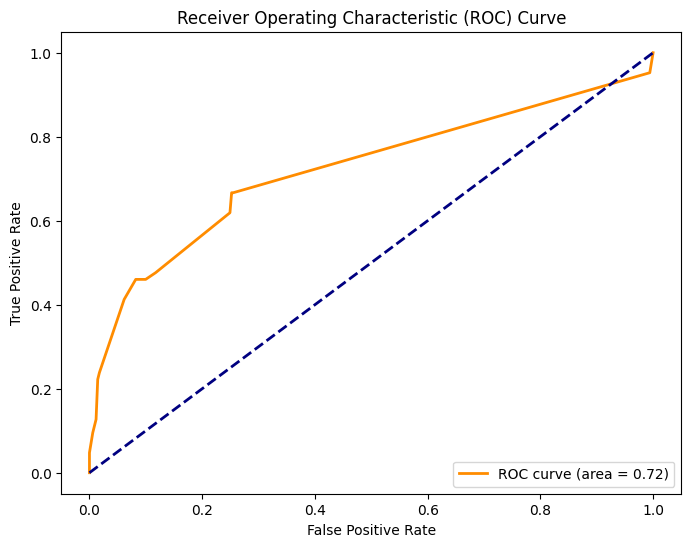

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Ensure that X_test and y_test are defined (they should come from your train-test split)
# Example:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_dt_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')  # Save the plot as a .png file
plt.show()


In [52]:
import pandas as pd

# Assuming y_test_pred is the predicted response variable
predictions = pd.DataFrame(y_test_pred, columns=['Predictions'])

# Save predictions to a CSV file
predictions.to_csv('predictions.csv', index=False)


In [53]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Classification Report (including F1-score)
class_report = classification_report(y_test, y_test_pred)

# Print classification report
print("Classification Report:")
print(class_report)

# Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png')  # Save the plot as a .png file
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [404, 2016]

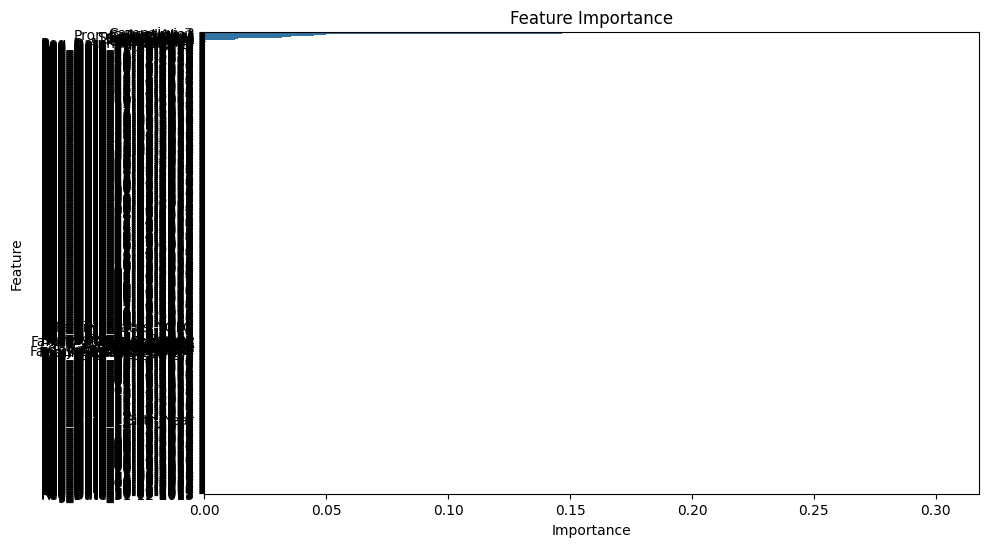

In [55]:
# Plot feature importances (for tree-based models like RandomForest or DecisionTree)
feature_importance = best_dt_model.feature_importances_
import seaborn as sns
# Create a DataFrame with feature names and their importance
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance')
plt.savefig('feature_importance.png')  # Save the plot as a .png file
plt.show()


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


Accuracy on Test Set: 0.8712871287128713

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       341
           1       0.82      0.22      0.35        63

    accuracy                           0.87       404
   macro avg       0.85      0.61      0.64       404
weighted avg       0.87      0.87      0.84       404



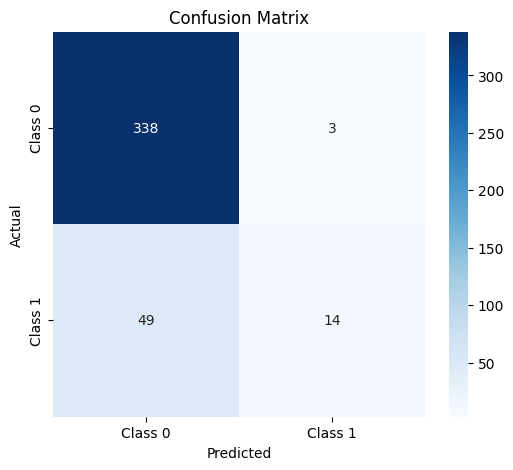

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [59]:
# Load the test dataset
test_data = pd.read_csv('test.csv')

# Ensure the same preprocessing is done on the test dataset
test_data_encoded = pd.get_dummies(test_data, columns=['Edu_Level', 'Family_Status', 'Reg_Date'], drop_first=True)

# Align the columns of the test set with the training set (if necessary)
test_data_encoded = test_data_encoded.reindex(columns=X_train_split.columns, fill_value=0)

# Check the transformed test data
print(test_data_encoded.head())


   User_Key  Birth_Year  Annual_Income  Kids_Count  Teens_Count  Last_Visit  \
0      9370        1945        65846.0           0            0          68   
1      4682        1958        51876.0           0            0          88   
2      4530        1948        78427.0           0            0          36   
3      8212        1971        39791.0           0            1          89   
4      6409        1967        57136.0           0            0          18   

   Spent_Wines  Spent_Fruits  Spent_Meat  Spent_Fish  ...  \
0          562            81         276          80  ...   
1           99            27         102          28  ...   
2          972            19         595         180  ...   
3           85            15          27          13  ...   
4          267           140         599          34  ...   

   Reg_Date_31-03-2013  Reg_Date_31-03-2014  Reg_Date_31-05-2013  \
0                False                    0                False   
1                False

In [60]:
# Make predictions on the test dataset
test_predictions = rf_model.predict(test_data_encoded)

# Check the predictions
print(test_predictions)


[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [61]:
# Save the predictions to a CSV file
test_predictions_df = pd.DataFrame(test_predictions, columns=['Predicted_Label'])

# You can add an ID column from the test data if necessary
test_predictions_df['User_Key'] = test_data['User_Key']

# Save to a CSV file
test_predictions_df.to_csv('test_predictions.csv', index=False)

print("Predictions saved to 'test_predictions.csv'")


Predictions saved to 'test_predictions.csv'
